<a href="https://colab.research.google.com/github/ANKITPANT1999/machine-learning-capstone-projects./blob/main/Copy_of_yes_bank_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#important libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

<ipython-input-3-75d0e54d8e9f>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [4]:
#important csv file
df = pd.read_csv('data_YesBank_StockPrices.csv')

In [5]:
#geeting starting few rows and columns
df.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
#no, of rows and columns in the data set
df.shape

(185, 5)

In [7]:
#values contains in columns
df.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close'], dtype=object)

In [8]:
#data types of the different data available
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [9]:
#searching duplicated values
df.duplicated().sum()

0

In [10]:
#searching null values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [11]:
# changing format
df["Date"]=df["Date"].apply(lambda x: datetime.strptime(x,"%b-%y"))
df.set_index('Date',inplace=True)

In [12]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [13]:
df.head(5)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


# Data Visualization

<ipython-input-14-80573c2bd9ee>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'],color="b")


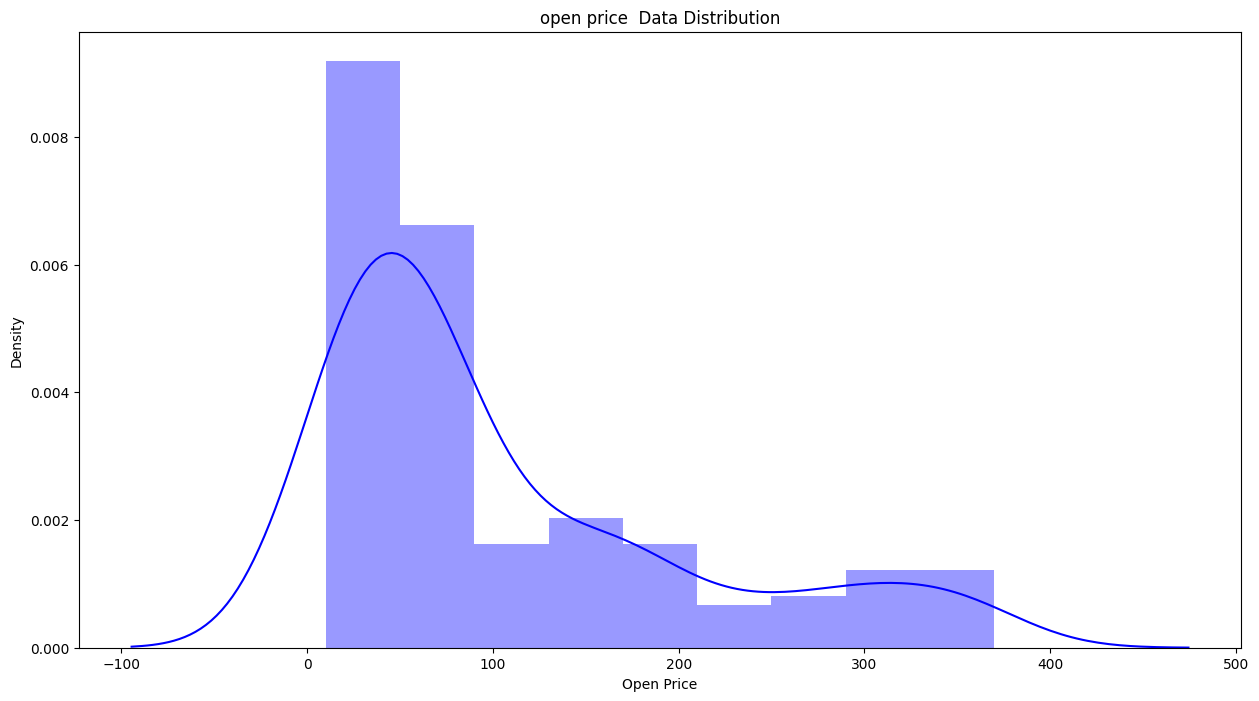

In [14]:
#open price distribution
# distribution of data
plt.figure(figsize=(15,8))
sns.distplot(df['Open'],color="b")
plt.title('open price  Data Distribution')
plt.xlabel('Open Price')
plt.show()

<ipython-input-15-4888c970b2d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'],color="g")


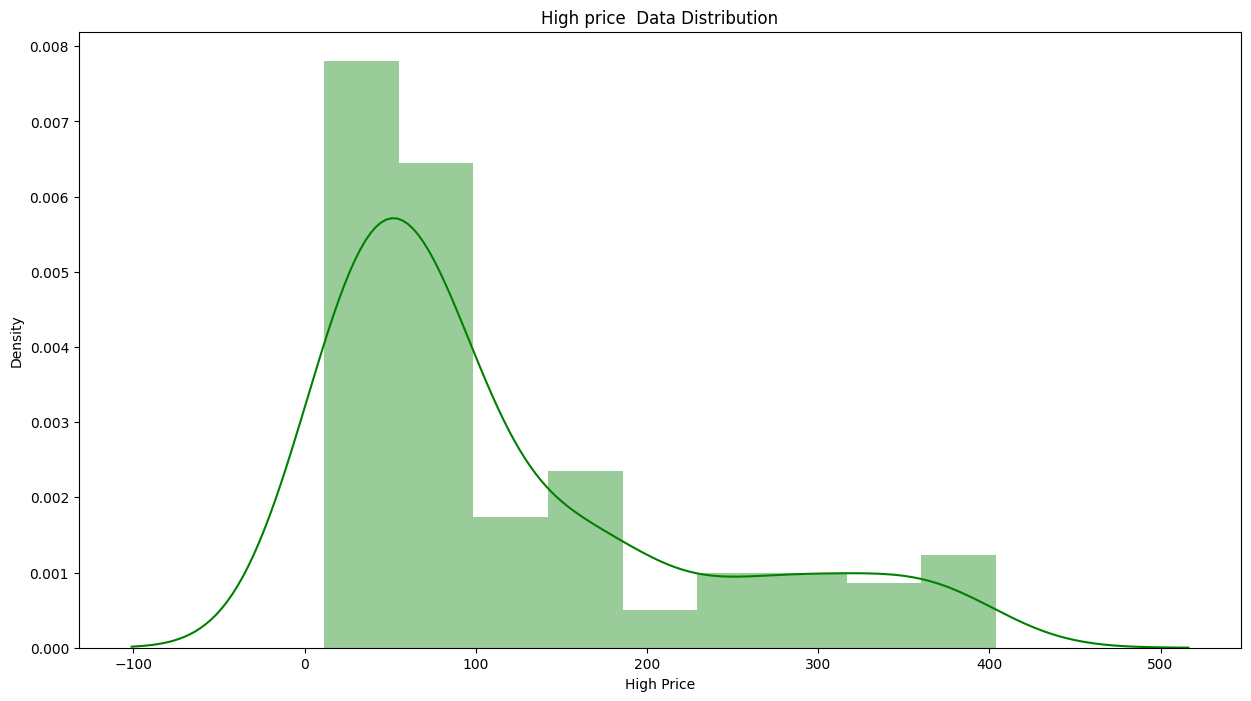

In [15]:
#high price distribution
plt.figure(figsize=(15,8))
sns.distplot(df['High'],color="g")
plt.title('High price  Data Distribution')
plt.xlabel('High Price')
plt.show()

<ipython-input-16-1304298de30b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Low'],color="r")


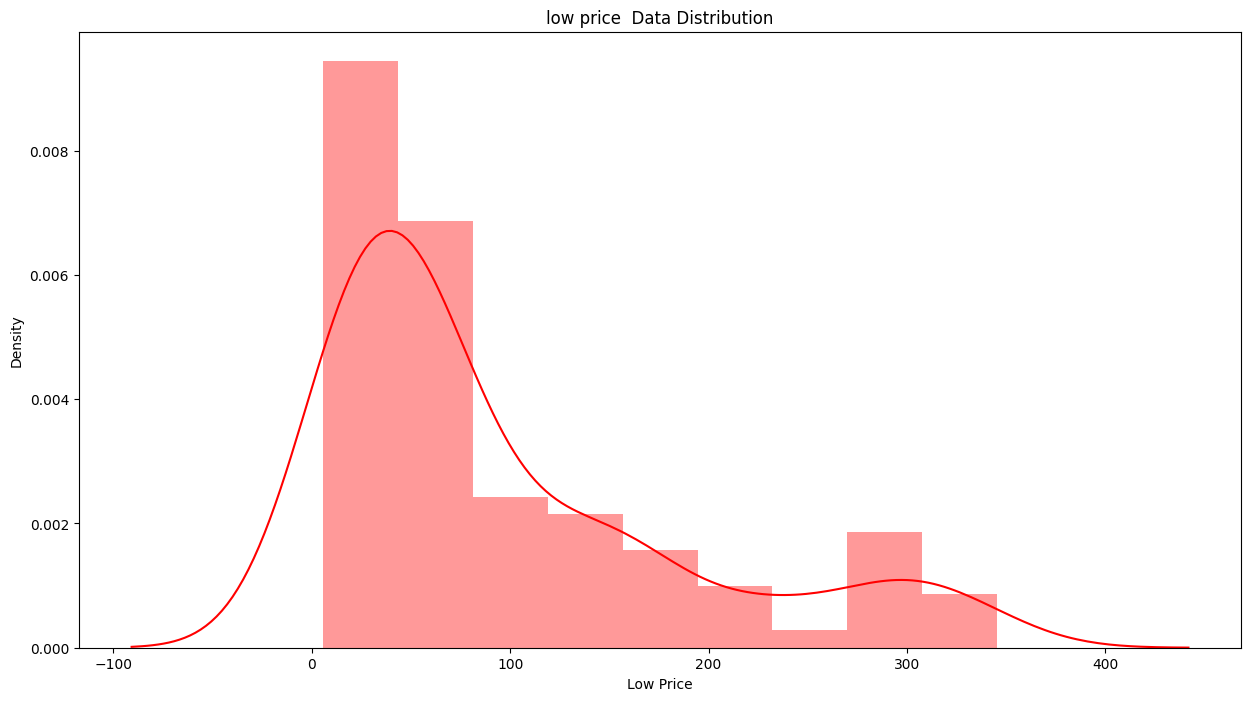

In [16]:
#low price distribution
plt.figure(figsize=(15,8))
sns.distplot(df['Low'],color="r")
plt.title('low price  Data Distribution')
plt.xlabel('Low Price')
plt.show()

<ipython-input-17-71b09c5431e9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'],color="y")


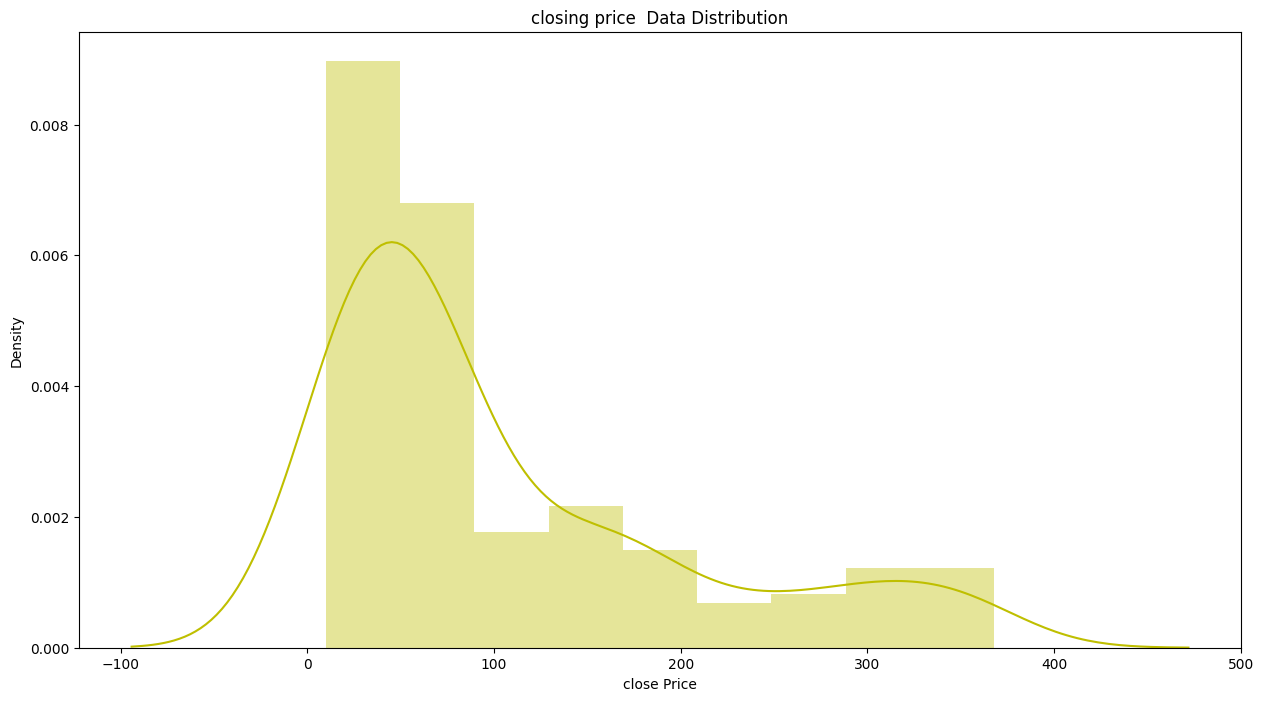

In [17]:
#close price distribution
plt.figure(figsize=(15,8))
sns.distplot(df['Close'],color="y")
plt.title('closing price  Data Distribution')
plt.xlabel('close Price')
plt.show()

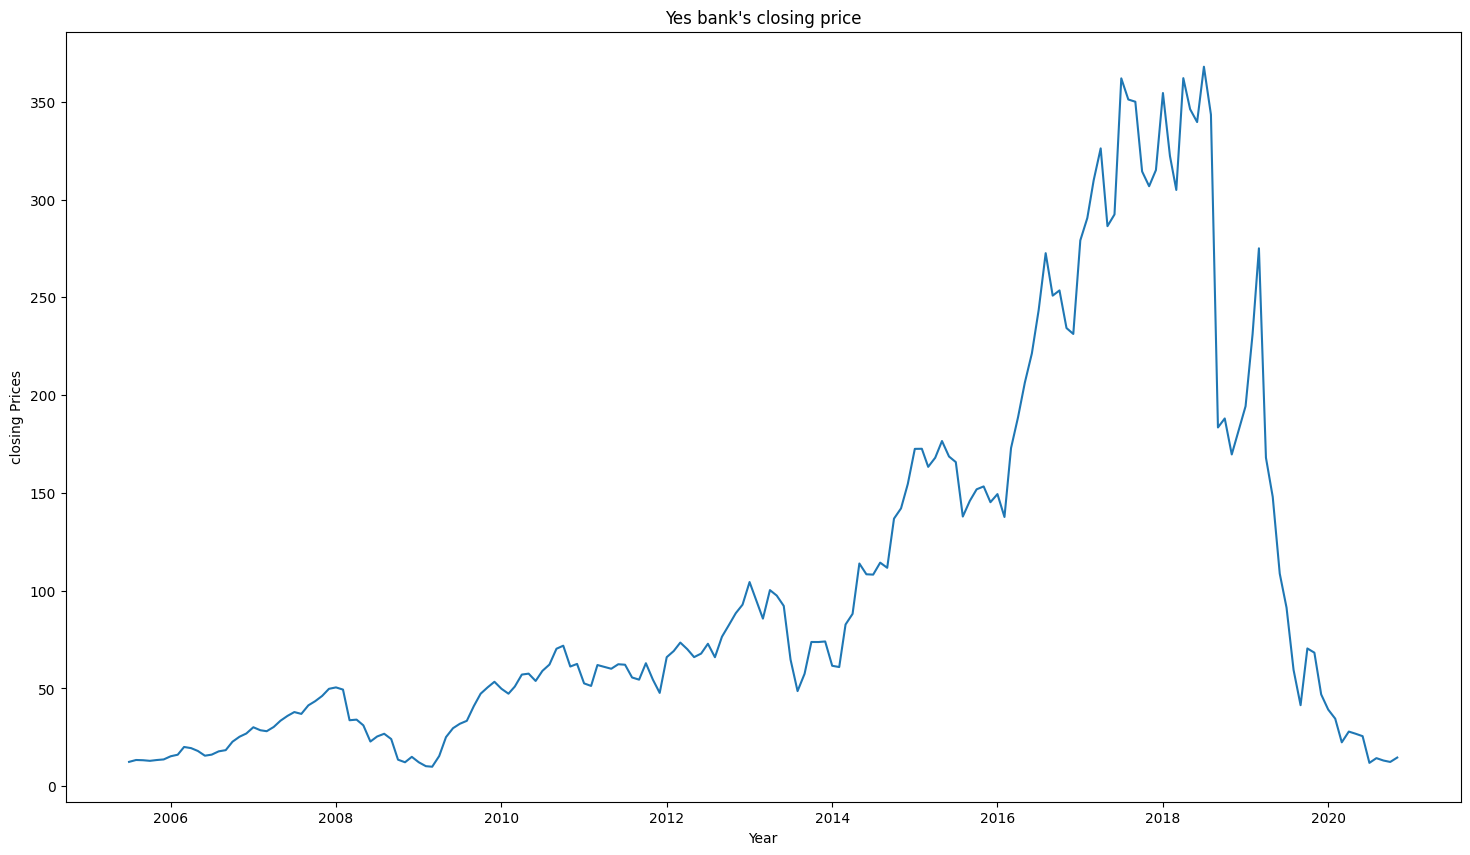

In [18]:
# Visualizing closing preice vs year
plt.figure(figsize=(18,10))
plt.xlabel('Year')
plt.ylabel('closing Prices')
plt.plot(df['Close'])
plt.title("Yes bank's closing price")
plt.show()

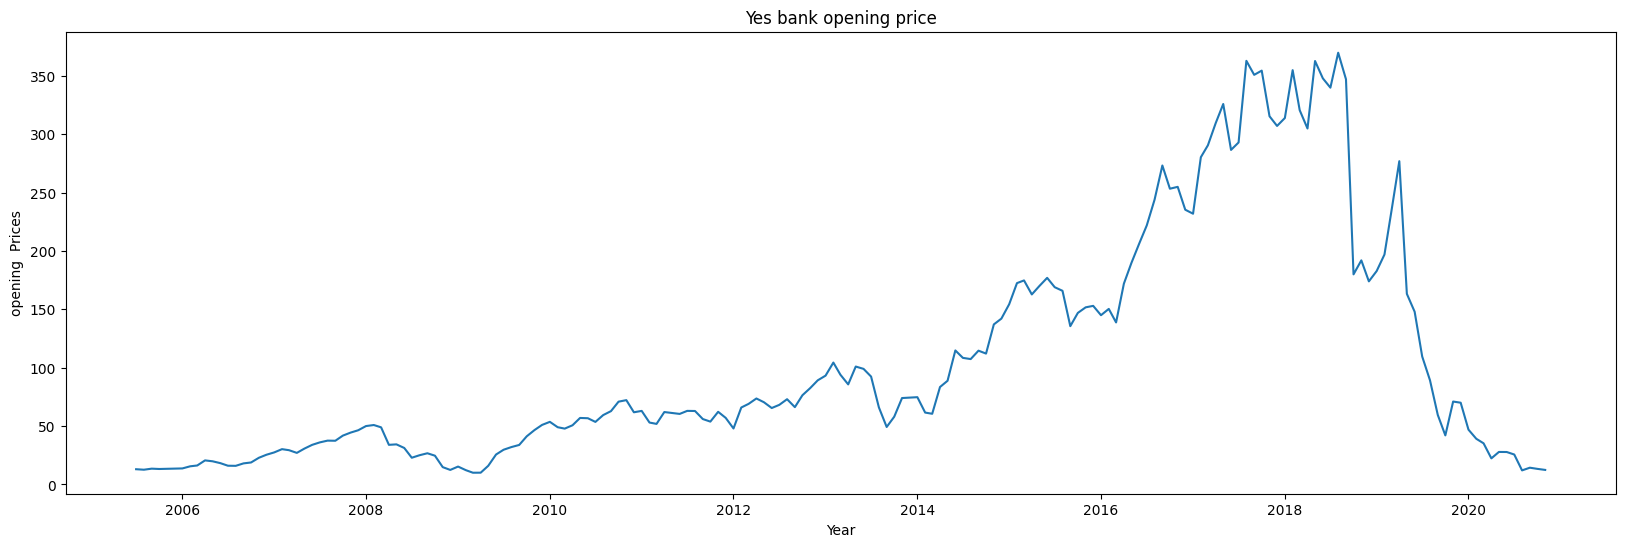

In [19]:
# visualizing opening price vs year
plt.figure(figsize=(20,6))
plt.xlabel('Year')
plt.ylabel('opening  Prices')
plt.plot(df['Open'])
plt.title('Yes bank opening price')
plt.show()

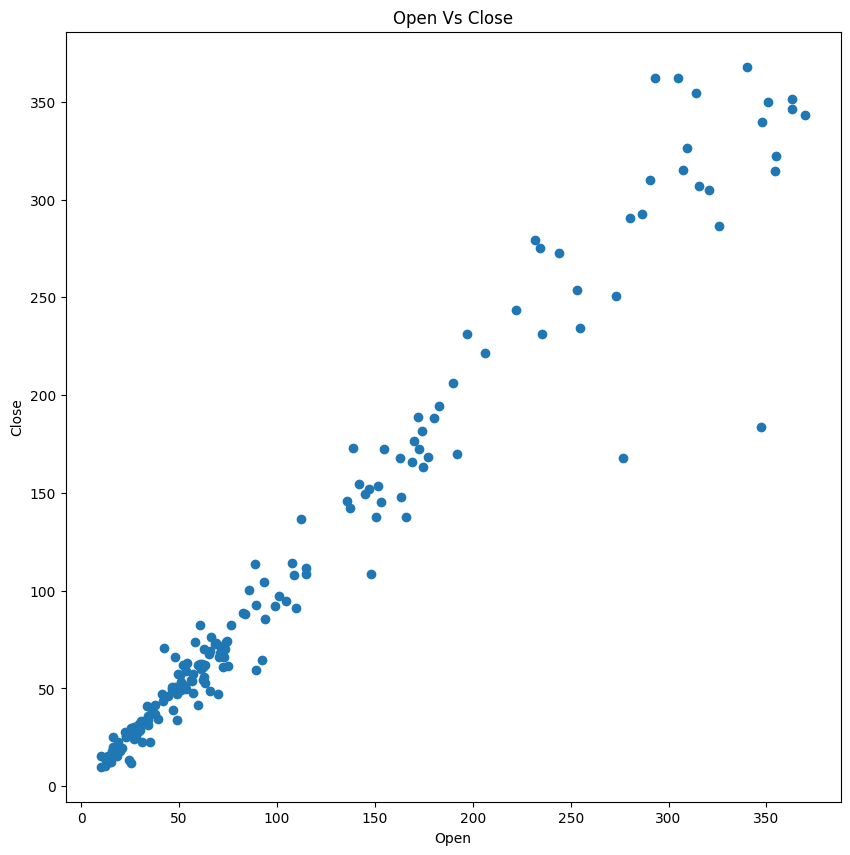

In [20]:
# open vs close
plt.figure(figsize=(10,10))
plt.scatter(df['Open'],df['Close'])
plt.title('Open Vs Close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()


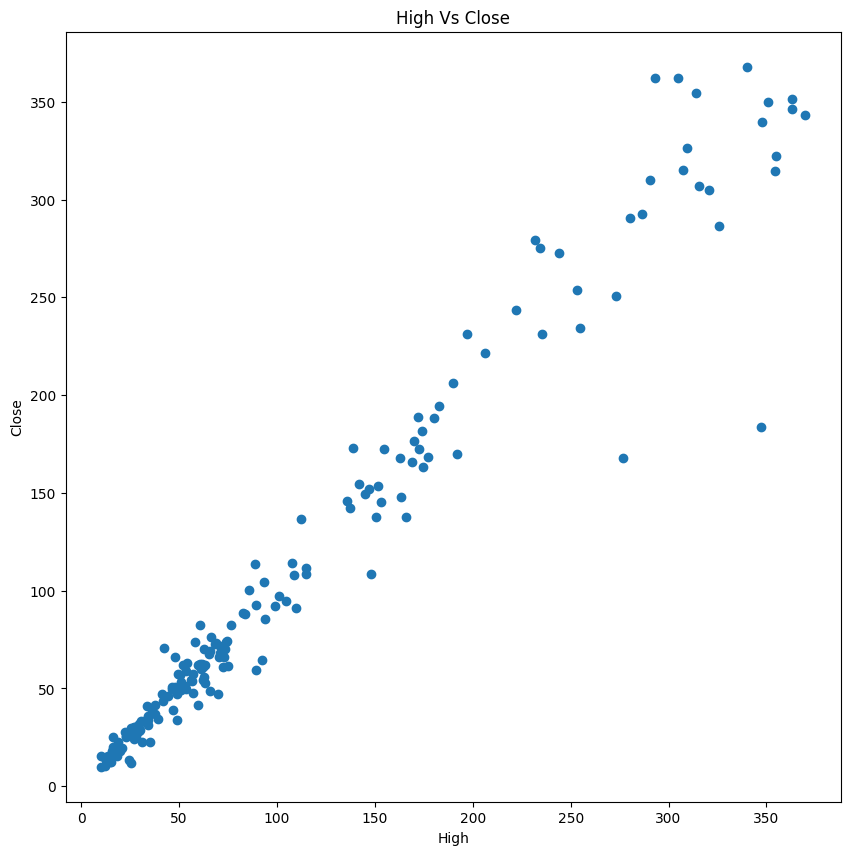

In [21]:
# high vs close
plt.figure(figsize=(10,10))
plt.scatter(df['Open'],df['Close'])
plt.title('High Vs Close')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

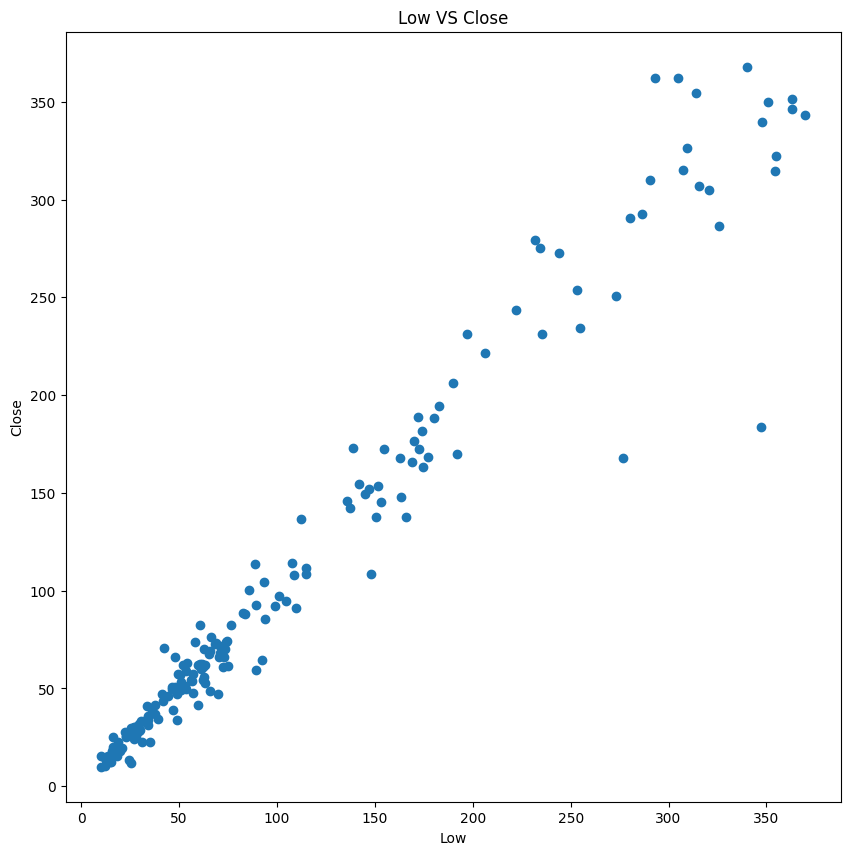

In [22]:
# low vs close
plt.figure(figsize=(10,10))
plt.scatter(df['Open'],df['Close'])
plt.title('Low VS Close')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

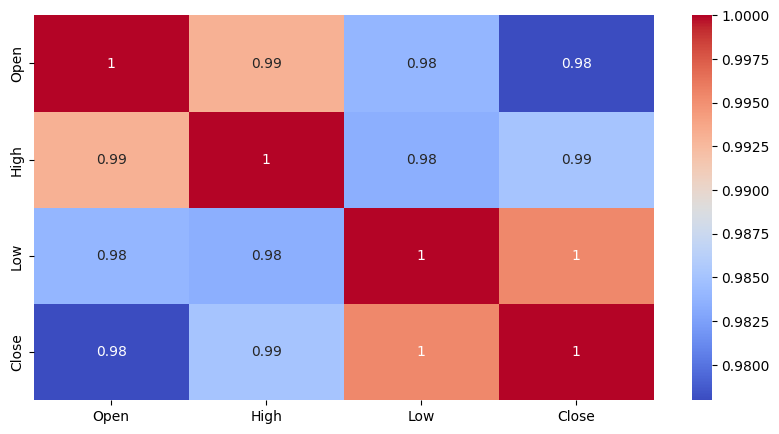

In [23]:
#finding correlation

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

# Now lets work with data modelling

In [24]:
# assigning independent and depenent varialble
indep_var=df[['High','Low','Open']].values
dep_var=df["Close"].values

In [25]:
indep_var

array([[ 14.  ,  11.25,  13.  ],
       [ 14.88,  12.55,  12.58],
       [ 14.87,  12.27,  13.48],
       [ 14.47,  12.4 ,  13.2 ],
       [ 13.88,  12.88,  13.35],
       [ 14.44,  13.  ,  13.49],
       [ 17.16,  13.58,  13.68],
       [ 16.97,  15.4 ,  15.5 ],
       [ 20.95,  16.02,  16.2 ],
       [ 20.8 ,  18.02,  20.56],
       [ 21.8 ,  15.8 ,  19.8 ],
       [ 18.4 ,  13.4 ,  18.2 ],
       [ 17.2 ,  13.82,  16.  ],
       [ 18.6 ,  15.7 ,  15.9 ],
       [ 18.88,  16.8 ,  18.  ],
       [ 24.2 ,  18.5 ,  18.78],
       [ 28.47,  21.4 ,  22.8 ],
       [ 29.66,  24.4 ,  25.4 ],
       [ 34.16,  27.  ,  27.4 ],
       [ 32.6 ,  26.8 ,  30.2 ],
       [ 31.58,  23.31,  29.3 ],
       [ 31.99,  26.2 ,  27.  ],
       [ 36.14,  29.11,  30.66],
       [ 36.38,  30.4 ,  33.89],
       [ 41.04,  35.02,  35.98],
       [ 39.  ,  30.2 ,  37.5 ],
       [ 41.75,  35.3 ,  37.4 ],
       [ 47.3 ,  33.6 ,  41.8 ],
       [ 50.98,  40.02,  44.4 ],
       [ 54.  ,  45.  ,  46.4 ],
       [ 5

In [26]:
#Train Test Split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=42)

In [27]:
x_train

array([[ 68.36,  55.44,  61.8 ],
       [ 57.69,  46.71,  53.  ],
       [ 53.97,  44.4 ,  50.88],
       [ 17.2 ,  13.82,  16.  ],
       [ 16.56,  11.13,  12.4 ],
       [262.72, 219.1 , 255.  ],
       [107.  ,  93.2 ,  93.2 ],
       [375.75, 299.  , 354.6 ],
       [ 83.36,  60.34,  60.52],
       [118.69, 103.31, 107.4 ],
       [ 29.8 ,  21.7 ,  26.68],
       [175.58, 156.45, 169.  ],
       [100.4 ,  57.71,  92.4 ],
       [ 63.7 ,  52.04,  62.2 ],
       [268.45, 168.6 , 180.  ],
       [ 14.87,  12.27,  13.48],
       [275.  , 240.68, 244.  ],
       [ 28.84,  14.76,  15.94],
       [ 70.5 ,  40.7 ,  70.  ],
       [350.1 , 327.35, 348.  ],
       [ 74.78,  65.27,  73.  ],
       [366.  , 307.35, 314.  ],
       [ 41.75,  35.3 ,  37.4 ],
       [350.  , 166.15, 347.2 ],
       [ 30.45,  20.3 ,  22.3 ],
       [173.88, 156.1 , 172.5 ],
       [ 66.5 ,  46.11,  47.92],
       [ 30.5 ,  20.4 ,  22.85],
       [175.12, 138.35, 138.8 ],
       [ 36.14,  29.11,  30.66],
       [11

In [28]:
#Checking shape
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


In [29]:
# mean of x_train
x_train.mean(axis=0)

array([117.40324324,  96.63540541, 107.09675676])

In [30]:
# mean of x_test
x_test.mean(axis=0)

array([110.90864865,  88.19756757,  99.32      ])

In [31]:
# standard deviation of x_train
x_train.std(axis=0)

array([106.86800299,  91.18688597,  99.27364008])

In [32]:
# standard deviation of x_train
x_test.std(axis=0)


array([102.52633397,  89.79346877,  95.66853785])

In [33]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [34]:
# mean of x_train
x_test_norm.mean(axis=0)

array([-1.32026522e-16,  8.70174803e-17,  7.50150692e-17])

In [35]:
# standard deviation of x_train
x_train_norm.std(axis=0)

array([1., 1., 1.])

In [36]:
# standard deviation of x_test
x_test_norm.std(axis=0)


array([1., 1., 1.])

# **Data Normalization is completed ,the mean is close to 0 and standard deviation is close to 1**

# Now we will perform Linear Regression

In [37]:
# implementing Linear_regression model
regres = LinearRegression().fit(x_train_norm, y_train)

In [38]:
# coefficient
regres.coef_

array([ 57.37023306,  91.49908703, -50.15576763])

In [39]:
# intercept
regres.intercept_

106.93182432432427

In [40]:
# predicted value
y_pred = regres.predict(x_test_norm)
y_pred

array([ 36.78644223,  21.01808124, 387.6879811 , 136.68055696,
       327.82972698,  29.61555   ,  46.85505809,  68.13904835,
       175.87611058,  71.09757582,  54.45192635, 207.18359402,
        74.40902715,  43.58212283,  21.73154362,  32.85243174,
        52.25529404,  31.77965714,  69.62763902,  59.33790608,
       190.26639663, 162.67633251, 389.56732303,  42.76419076,
        26.29071504, 143.78061212,  67.12097163,  39.33110888,
        58.19887935, 155.85866627,  64.13637429,  55.63295239,
       176.5776747 , 273.24777984,  59.93306232,  58.813748  ,
        43.48343886])

In [41]:
# model accuray
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE :",mean_absolute_error(y_test, y_pred))
print("R2 :",r2_score(y_test, y_pred))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))


MSE : 172.0169027354589
RMSE : 13.11552144352099
MAE : 10.664853845189194
R2 : 0.9809691253775973
Adjusted R2: 0.9792390458664698


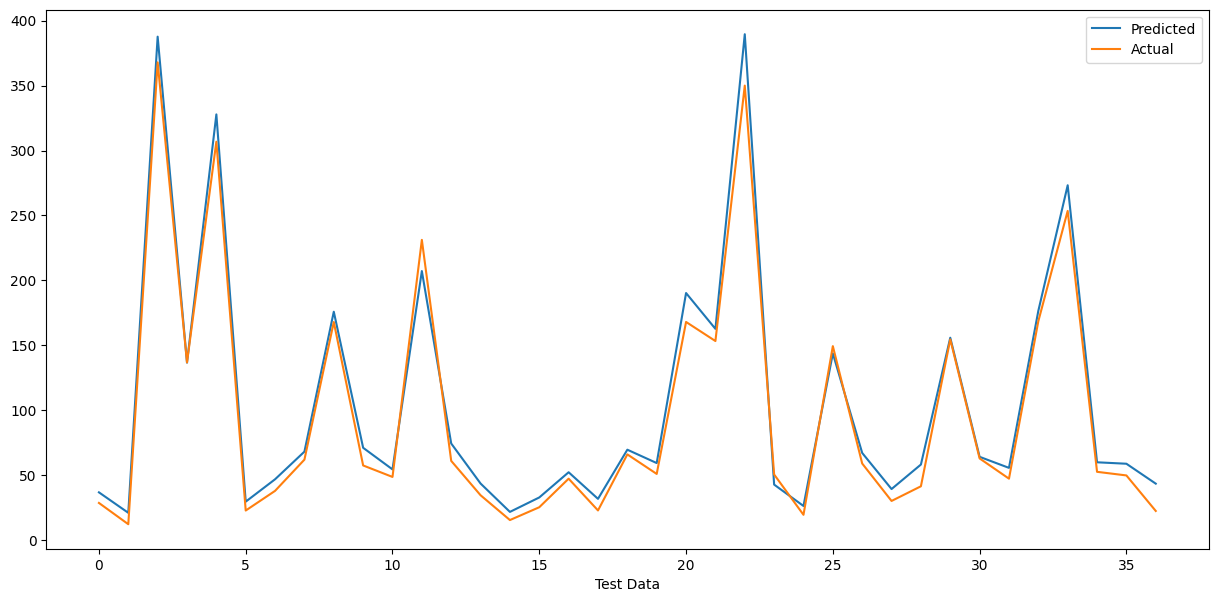

In [42]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

Linear regression is giving about 99% correct prediction.

# LASSO REGRESSION

In [43]:
# implementing lasso_regression model
lasso  = Lasso(alpha=0.0001 , max_iter= 2000)
lasso.fit(x_train_norm, y_train)


Lasso(alpha=0.0001, max_iter=2000)

In [44]:
# predictions
lasso_pred=lasso.predict(x_test_norm)
lasso_pred


array([ 36.78694459,  21.01834606, 387.68640592, 136.67957734,
       327.83138779,  29.61574696,  46.85544486,  68.13875853,
       175.87704181,  71.0954748 ,  54.45212293, 207.18105623,
        74.40954337,  43.58271881,  21.7314491 ,  32.85260265,
        52.25498959,  31.78011342,  69.62847327,  59.3385145 ,
       190.26468742, 162.67755108, 389.56807336,  42.76395585,
        26.29136798, 143.78148138,  67.1213225 ,  39.3312557 ,
        58.19803332, 155.85909355,  64.13616582,  55.63360457,
       176.57914747, 273.2494698 ,  59.93370405,  58.81396992,
        43.47790369])

In [45]:
# model accuray
print("MSE :",mean_squared_error(y_test, lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, lasso_pred)))
print("MAE :",mean_absolute_error(y_test, lasso_pred))
print("R2 :",r2_score(y_test, lasso_pred))
print("Adjusted R2:",1-(1-r2_score((y_test), (lasso_pred)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))


MSE : 172.01763221750002
RMSE : 13.115549253367165
MAE : 10.665009686010295
R2 : 0.9809690446722652
Adjusted R2: 0.9792389578242893


In [46]:
# Let's check through cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+03, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+03, tolerance: 1.080e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+03, tolerance: 1.156e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [47]:
#Best alpha value is
lasso_regressor.best_params_

{'alpha': 0.001}

In [48]:
#Best score
lasso_regressor.best_score_

-47.887251929651974

In [49]:
# predictions
y_pred_lasso = lasso_regressor.predict(x_test_norm)
y_pred_lasso

array([ 36.79002588,  21.01983654, 387.67727947, 136.67346322,
       327.84276909,  29.61687095,  46.8578448 ,  68.1368715 ,
       175.88331836,  71.08188593,  54.45307082, 207.16484025,
        74.41286793,  43.58640295,  21.73066896,  32.85355718,
        52.25291362,  31.78281999,  69.63371436,  59.34239204,
       190.25279784, 162.68563992, 389.57396528,  42.76211693,
        26.29539295, 143.78712688,  67.12356706,  39.33208928,
        58.19232363, 155.86205415,  64.13473505,  55.63770602,
       176.58880283, 273.26098543,  59.93764666,  58.81534423,
        43.44179205])

In [50]:
# model accuray
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))


MSE : 172.0246066392485
RMSE : 13.11581513438065
MAE : 10.666010957761797
R2 : 0.9809682730658489
Adjusted R2: 0.9792381160718352


 accuracy almost 98%

# Visualizing actual values and predicted values

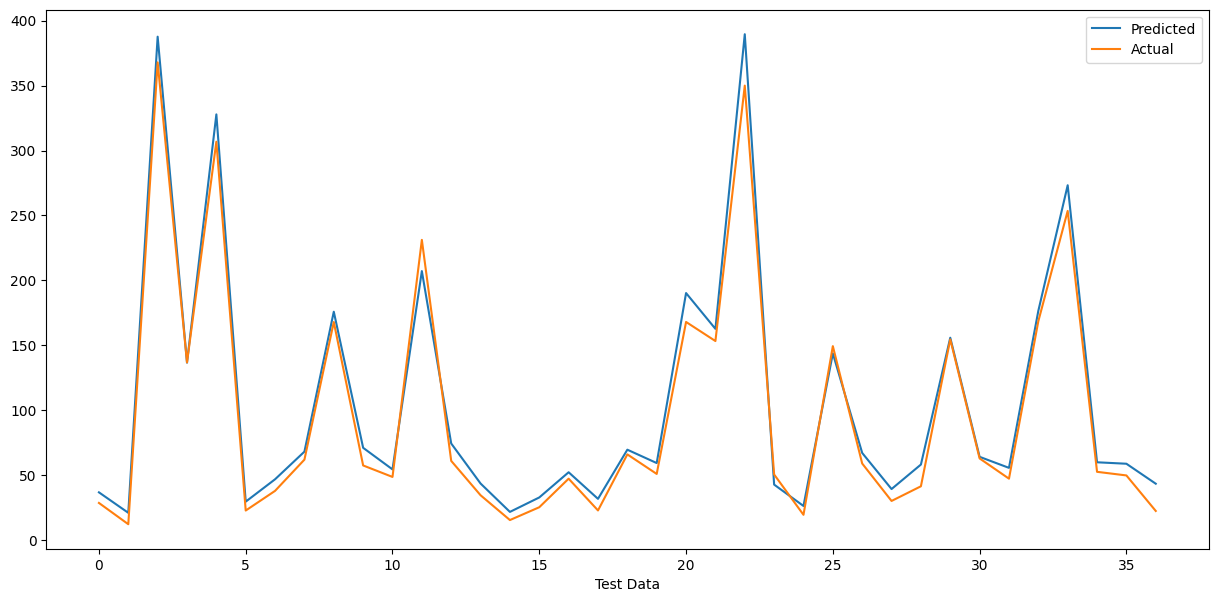

In [51]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

# Ridge regression

In [52]:
# implementing ridge_regression model
ridge  = Ridge(alpha=0.01)
ridge.fit(x_train_norm,y_train)

Ridge(alpha=0.01)

In [53]:
Ridge(alpha=0.01)

Ridge(alpha=0.01)

In [54]:
# predictions
ridge_pred=ridge.predict(x_test_norm)
ridge_pred

array([ 36.79685714,  21.02522688, 387.54183299, 136.60725443,
       327.86222668,  29.60554568,  46.84993033,  68.10325997,
       175.88253232,  71.0051182 ,  54.51406788, 207.12591806,
        74.40328266,  43.601576  ,  21.71212372,  32.84451369,
        52.2349556 ,  31.80789199,  69.67023401,  59.33611961,
       190.53250008, 162.69500762, 389.50035026,  42.80272259,
        26.30653953, 143.8292642 ,  67.10759733,  39.31706364,
        58.20627231, 155.850935  ,  64.12100641,  55.64744263,
       176.63855229, 273.25428252,  59.97819249,  58.80081752,
        43.35848572])

In [55]:
# model accuracy
print("MSE :",mean_squared_error(y_test, ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, ridge_pred)))
print("MAE :",mean_absolute_error(y_test, ridge_pred))
print("R2 :",r2_score(y_test, ridge_pred))
print("Adjusted R2:",1-(1-r2_score((y_test), (ridge_pred)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))


MSE : 171.99540764541243
RMSE : 13.114701965558059
MAE : 10.6672211197125
R2 : 0.980971503459967
Adjusted R2: 0.9792416401381457


In [56]:
# cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train_norm,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [57]:
# best parameter
ridge_regressor.best_params_

{'alpha': 0.01}

In [58]:
# best score
ridge_regressor.best_score_

-48.45396150468387

In [59]:
#Prediction
y_pred_ridge = ridge_regressor.predict(x_test_norm)
y_pred_ridge


array([ 36.79685714,  21.02522688, 387.54183299, 136.60725443,
       327.86222668,  29.60554568,  46.84993033,  68.10325997,
       175.88253232,  71.0051182 ,  54.51406788, 207.12591806,
        74.40328266,  43.601576  ,  21.71212372,  32.84451369,
        52.2349556 ,  31.80789199,  69.67023401,  59.33611961,
       190.53250008, 162.69500762, 389.50035026,  42.80272259,
        26.30653953, 143.8292642 ,  67.10759733,  39.31706364,
        58.20627231, 155.850935  ,  64.12100641,  55.64744263,
       176.63855229, 273.25428252,  59.97819249,  58.80081752,
        43.35848572])

In [60]:
# model accuracy
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))


MSE : 171.99540764541243
RMSE : 13.114701965558059
MAE : 10.6672211197125
R2 : 0.980971503459967
Adjusted R2: 0.9792416401381457


accuracy almost 98%

# Visualizing actual values and predicted values

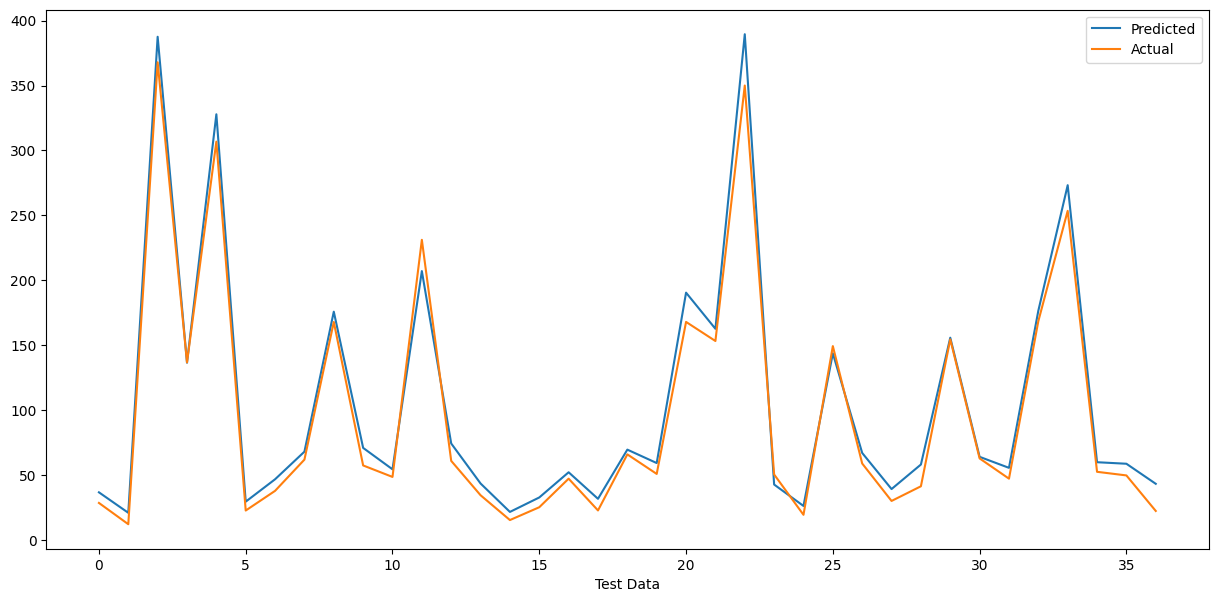

In [61]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()


# CONCLUSION
This dataset has 185 rows and 5 columns.

Histogram plot of all feaures are rightly skewed.

The sudden crash we see in the graph after 2018 is might be due to the spread of Fraud case news among Stock Holder's which creates bearishness in the stock prices.

In the Dataset Close Column is dependent Variable and Open, High, Low column's are independent features.

Dependent and Independent features are linearly related with each other.

The Heatmap is showing high correlation between the features.

Then We implemented Linear regression ,Lasso regression,Ridge regression  and the accuracy score that we got is almost 98%,which shows that we achieve the almost best fit model for our dataset.